<a href="https://colab.research.google.com/github/KiranVarghese25/Predictive_analytics/blob/main/Pred_analytics_lab2_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [23]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Loading the Dataset

In [2]:
housing = fetch_california_housing()
data=pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target

data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.shape

(20640, 9)

In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [7]:
#checking for null values
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [10]:
#Outlier detection
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    data = remove_outliers_iqr(data, column)

print("Data shape after outlier removal:", data.shape)


Data shape after outlier removal: (16232, 9)


In [12]:
#Normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)



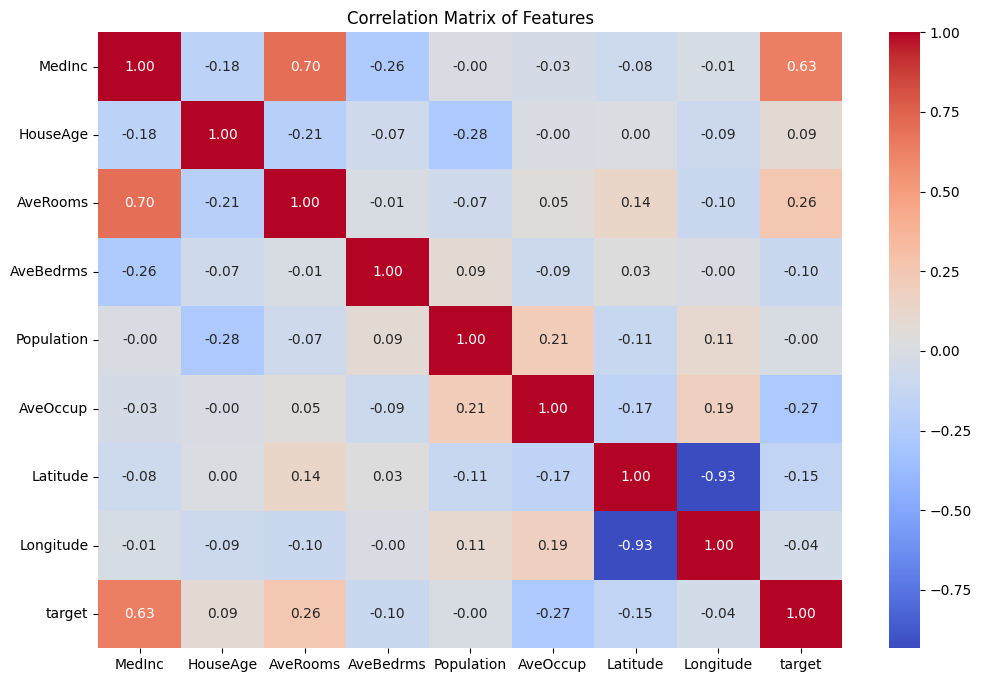

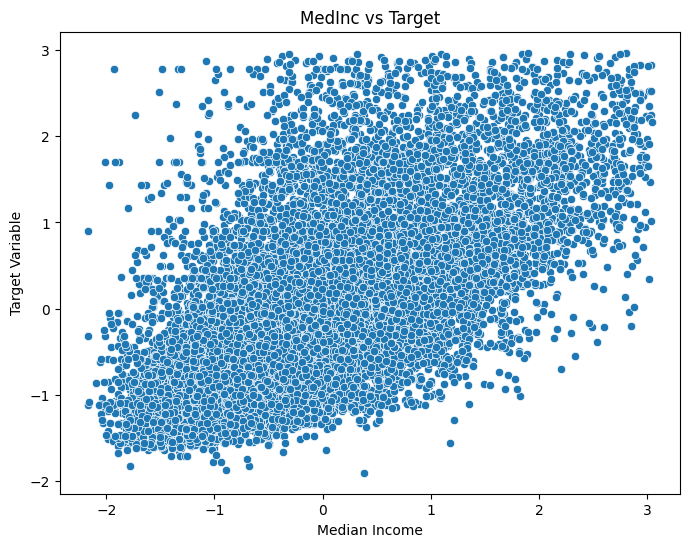

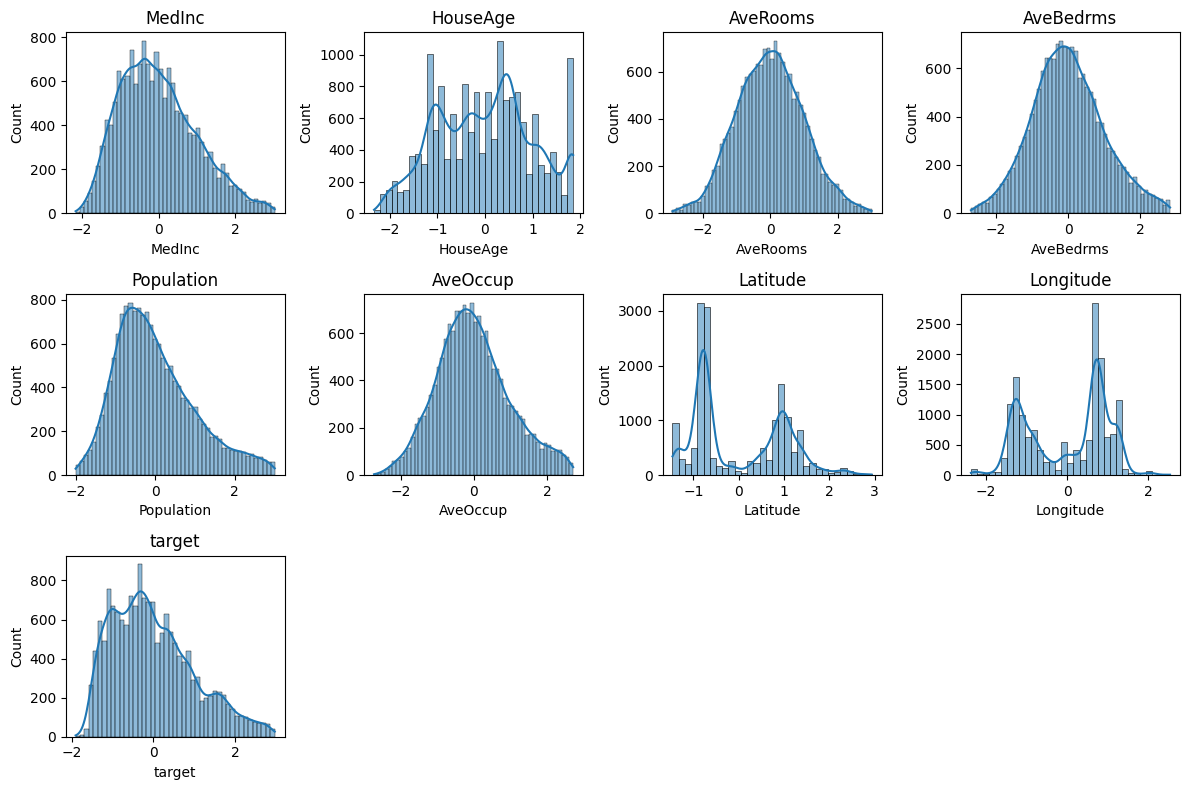

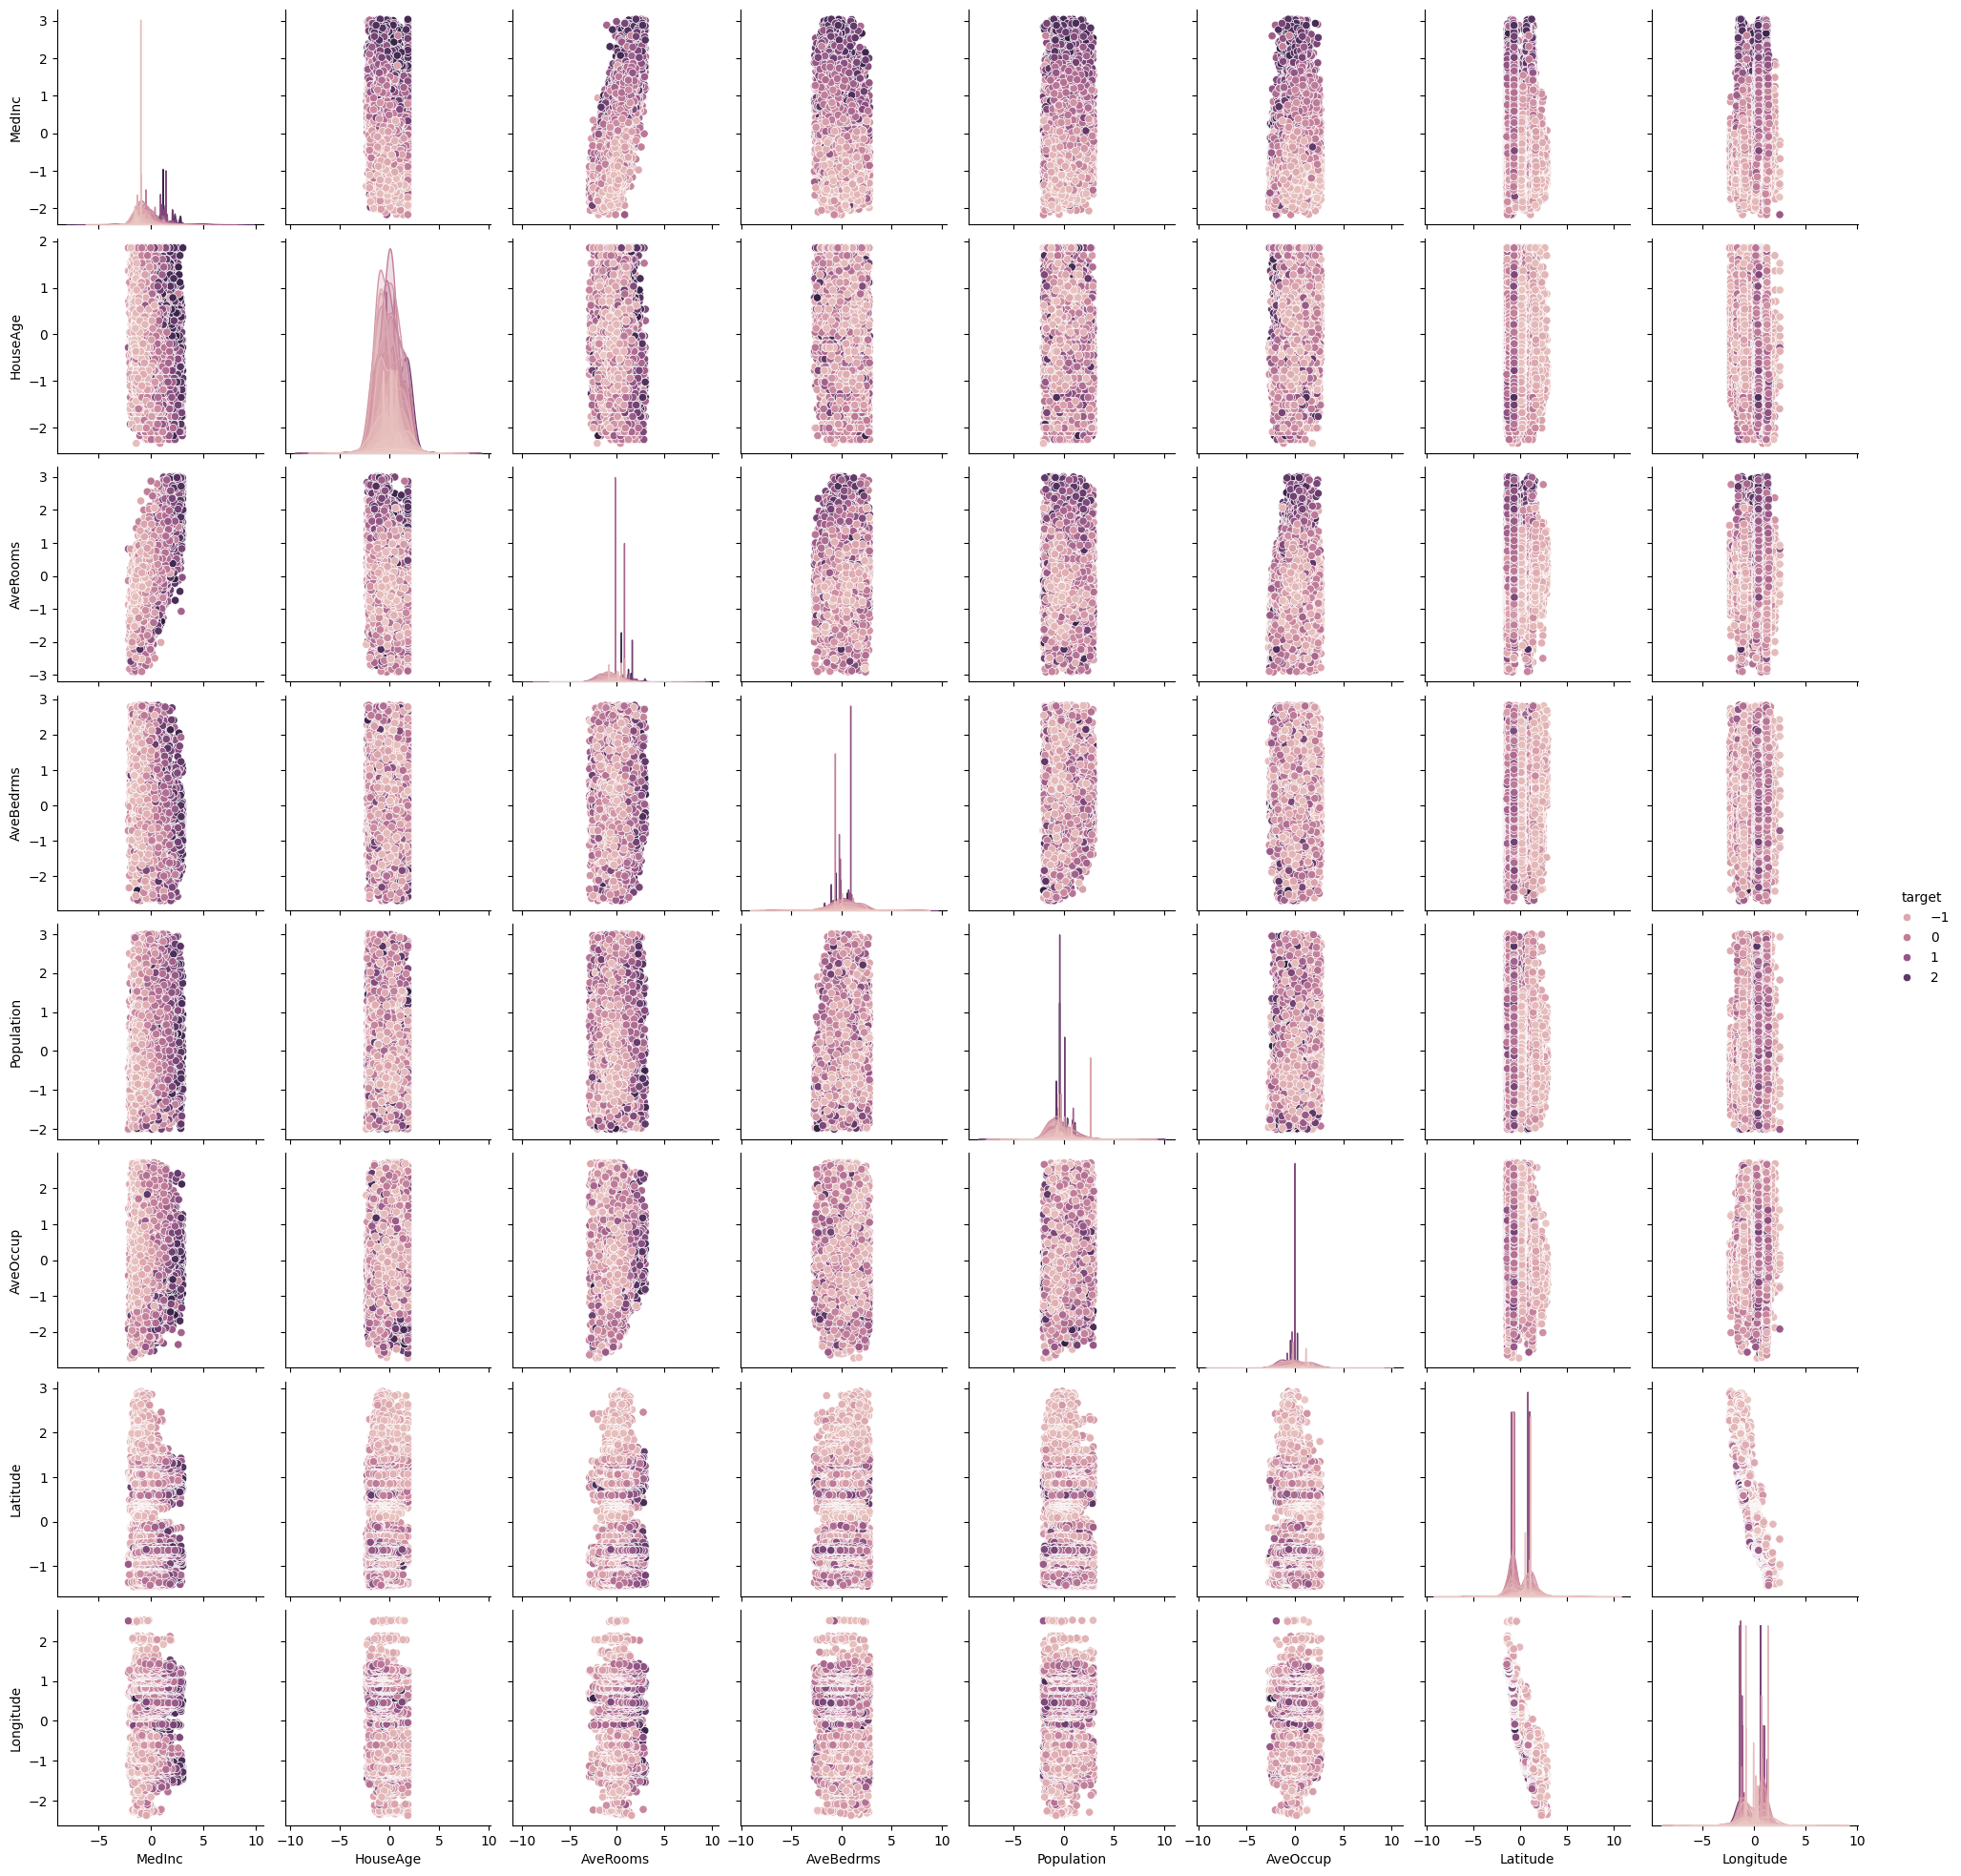

In [13]:
# Correlation Heatmap
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Scatter Plots (Example: MedInc vs Target)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='target', data=df_scaled)
plt.title('MedInc vs Target')
plt.xlabel('Median Income')
plt.ylabel('Target Variable')
plt.show()

# Histograms for Feature Distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns):
  plt.subplot(3, 4, i + 1)
  sns.histplot(df_scaled[column], kde=True)
  plt.title(column)
plt.tight_layout()
plt.show()

# Pairplot for visualizing relationships between multiple features and the target
sns.pairplot(df_scaled, hue='target', diag_kind='kde')
plt.show()


# Splitting the dataset

In [16]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [20]:
#Intializing the model

linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)


#Fitting the model

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)


#Making predictions using the model

linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)



#Evaluating the model performance
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.3f}, R^2: {r2:.3f}")

evaluate_model(y_test, linear_predictions, "Multiple Linear Regression")
evaluate_model(y_test, ridge_predictions, "Ridge Regression")
evaluate_model(y_test, lasso_predictions, "Lasso Regression")

Multiple Linear Regression - MSE: 0.364, R^2: 0.624
Ridge Regression - MSE: 0.364, R^2: 0.624
Lasso Regression - MSE: 0.968, R^2: -0.000


# HyperParameter tuning


In [21]:

# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
print("Best parameters for Ridge Regression:", ridge_grid_search.best_params_)

# Hyperparameter tuning for Lasso Regression
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(estimator=Lasso(), param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
print("Best parameters for Lasso Regression:", lasso_grid_search.best_params_)

# Retrain models with best hyperparameters
best_ridge_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
best_ridge_model.fit(X_train, y_train)
best_ridge_predictions = best_ridge_model.predict(X_test)

best_lasso_model = Lasso(alpha=lasso_grid_search.best_params_['alpha'])
best_lasso_model.fit(X_train, y_train)
best_lasso_predictions = best_lasso_model.predict(X_test)

# Evaluate models with best hyperparameters
evaluate_model(y_test, best_ridge_predictions, "Ridge Regression (Tuned)")
evaluate_model(y_test, best_lasso_predictions, "Lasso Regression (Tuned)")


Best parameters for Ridge Regression: {'alpha': 0.1}
Best parameters for Lasso Regression: {'alpha': 0.1}
Ridge Regression (Tuned) - MSE: 0.364, R^2: 0.624
Lasso Regression (Tuned) - MSE: 0.504, R^2: 0.479


# Inference


In this notebook, we utilized the "California Housing Dataset" from the sklearn library, which consists of 20,640 rows and 7 columns: 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', and the target variable. As part of data preprocessing, we removed outliers, checked for null values, and scaled the dataset. We conducted bivariate analysis before splitting the dataset into training and testing sets to build our models. The models we built include Multiple Linear Regression, Ridge Regression, and Lasso Regression. We performed hyperparameter tuning, resulting in the best parameters for Ridge Regression as {'alpha': 0.1} and for Lasso Regression as {'alpha': 0.1}. The evaluation results showed that Multiple Linear Regression achieved an MSE of 0.364 and an R² of 0.624, while Ridge Regression (tuned) matched these metrics. However, Lasso Regression (tuned) showed an MSE of 0.504 and an R² of 0.479, indicating less effective performance in this instance